<a href="https://colab.research.google.com/github/wfa19/Coding-/blob/main/notebook9f8afff85d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project focuses on performing an in-depth exploratory data analysis (EDA) of Airbnb listings within Albany, New York, United States. The goal is to meticulously examine various factors such as price, availability, location, property type, and other relevant attributes to uncover the underlying trends and patterns that significantly influence the demand for Airbnb listings in this region. In particular, demand will be quantified by analyzing the frequency of room availability over the past 90 days, with lower availability indicating higher demand.

The city of Albany, located in upstate New York, boasts a diverse Airbnb market with offerings ranging from cozy apartments to spacious homes. Understanding the dynamics of this market is crucial for both Airbnb hosts seeking to optimize their listings and potential guests looking for suitable accommodations.

Through this comprehensive analysis, we aim to provide stakeholders, including property owners, Airbnb hosts, investors, and tourism agencies, with valuable insights that can inform strategic decision-making and maximize returns. By delving into the data, we seek to answer key questions.The study makes use of AirbnB data from the following link:http://insideairbnb.com/get-the-data/


# Loading data and selecting desired atributes

The data collected includes many atributes including calculated attributes, for this study the following variables of intrest were selected: id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value and instant_bookable.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [ ]:
listing=pd.read_csv('/kaggle/input/listing/listings.csv')
listing=listing[['id','host_id','host_since','host_response_time','host_response_rate','host_acceptance_rate','host_is_superhost',
 'host_listings_count','host_identity_verified','neighbourhood_cleansed','latitude','longitude',
'property_type','room_type','accommodates','bathrooms','bedrooms','beds','price','minimum_nights',
 'maximum_nights','availability_90','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
 'review_scores_location','review_scores_value','instant_bookable']]
calendar=pd.read_csv('/kaggle/input/listing/calendar.csv')

# Data cleaning and preprocessing

## 1) correcting data types
Variables price,host_response_rate and host_acceptance_rate had dollar sign($) and % sign  respectively which  makes them to be encoded as objects rather than numeric variables. They were converted to numeric by stripping off those signs.

In [ ]:
# Convert 'price' column to float
listing['price'] =listing['price'].replace('[\$,]', '', regex=True).astype(float)
listing['host_response_rate'] = listing['host_response_rate'].replace('%', '', regex=True).astype(float)
listing['host_acceptance_rate'] = listing['host_acceptance_rate'].replace('%', '', regex=True).astype(float)

data=listing

## 2) Handling missing values
the number of `reviews_per_month`(11.55%) had the highest percentage of missing values among the chosen variables, follows by `review_scores_value`,`review_scores_rating`,`review_scores_accuracy`,
`review_scores_cleanliness`,`review_scores_checkin`,`review_scores_location` and `review_scores_communication` with 11.30% missingness. whether host is a supper host or not and the number of bedrooms have the least number of missingness. _Figure 1_ below reports the percentage of missing cases for each variable.

In [ ]:
missing_values = data.isnull().sum()
total_entries = data.shape[0]  # Total number of rows
missing_values =(missing_values / total_entries) * 100
missing_values=np.round(missing_values.sort_values(ascending=False),2)
missing_values=missing_values.reset_index()
missing_values.columns = ['Category', 'value']
#missing_values=missing_values.rename(columns={0: 'value','index': 'Category'})
missing_values=missing_values[missing_values['value'] > 1]

Text(0.5, 1.0, 'Bar Plot of Missing Values')

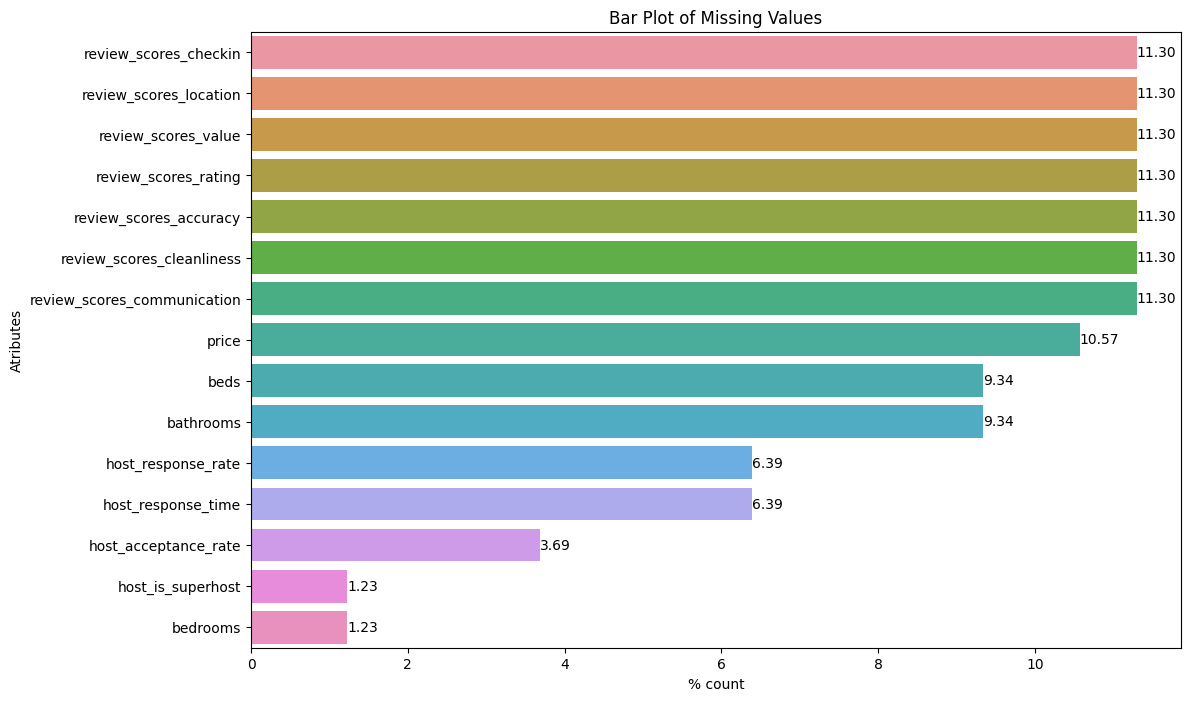

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='value', y='Category',data=missing_values)
for index, value in enumerate(missing_values['value']):
    plt.text(value, index, f'{value:.2f}', va='center')
plt.xlabel('% count')
plt.ylabel('Atributes')
plt.title('Bar Plot of Missing Values')

A viable solution was to replace these missing cases with statistical moments such as mean median and mode, but the distribution of the variables impacts what statistic is appropriate. The boxplots below show that most of the variables are skewed with outliers. Which means median imputation works better than mean.
Missing cases were rgere fore imputed  with median values for the numeric variables and mode for the categorical variables.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1000x1500 with 0 Axes>

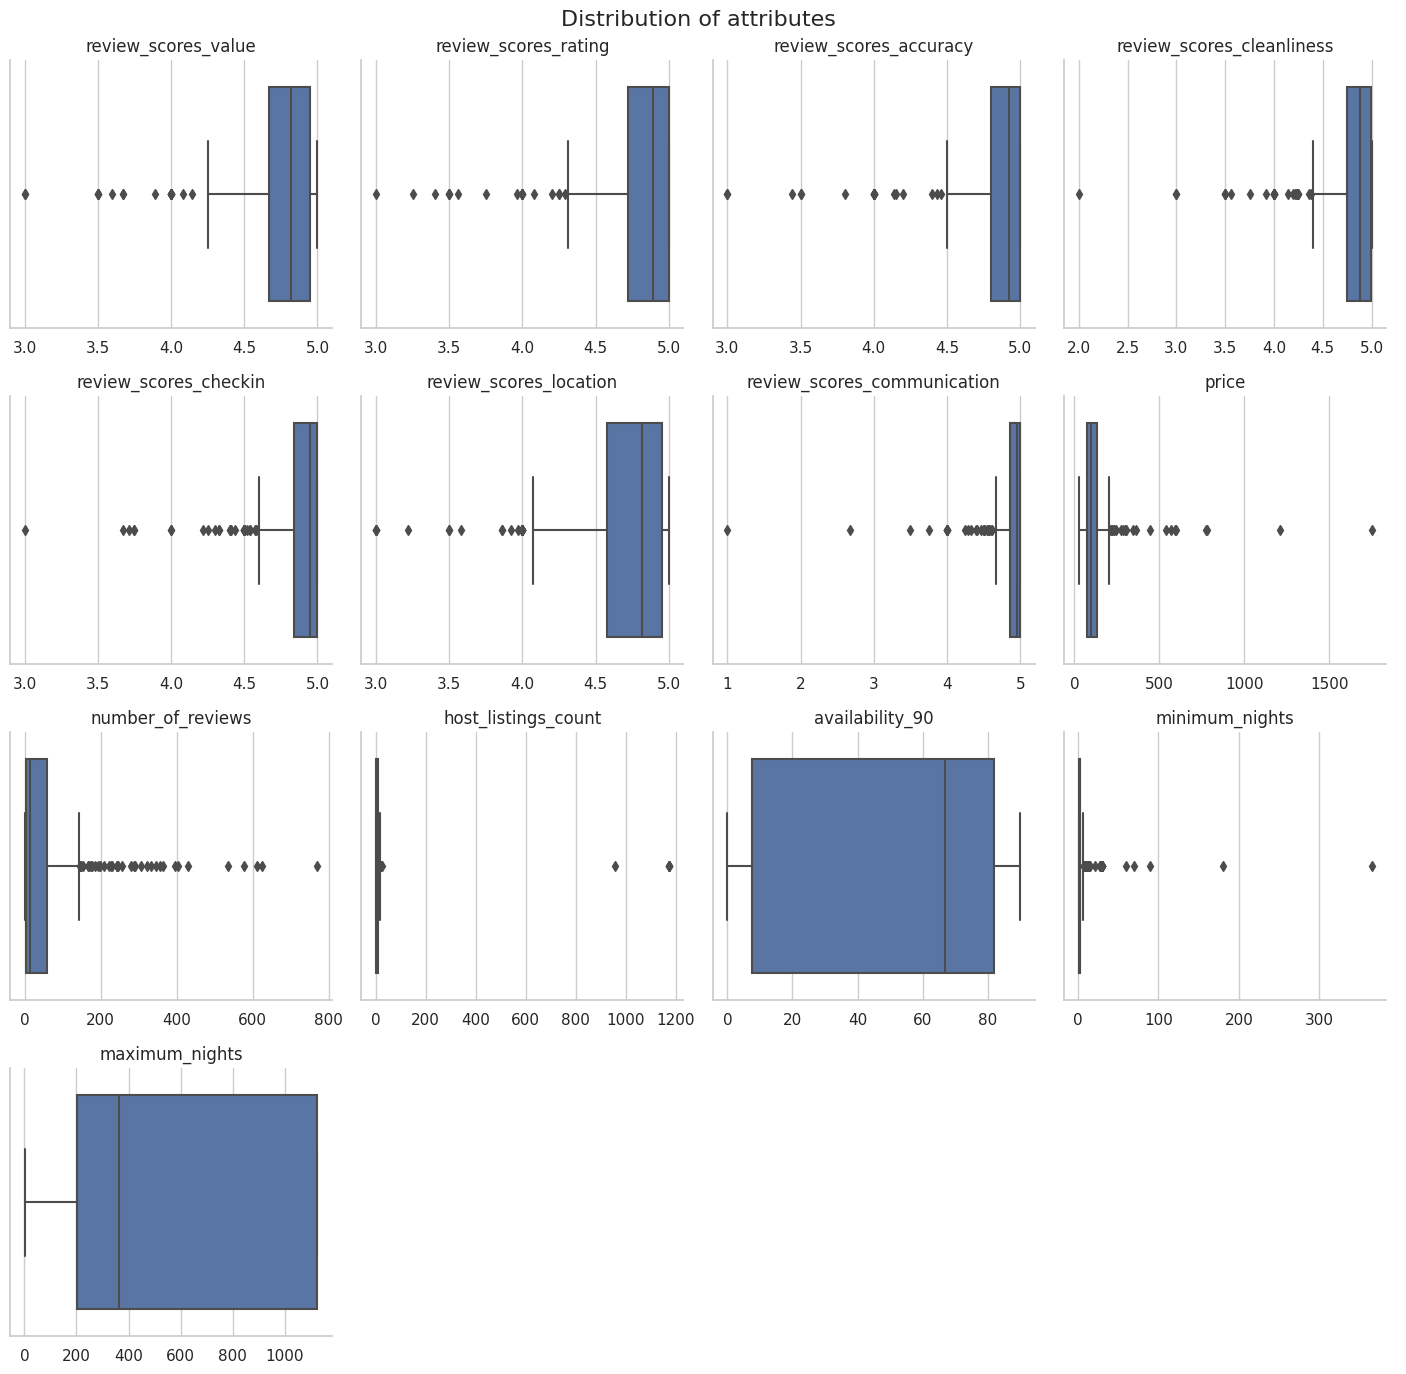

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 1000x1500 with 0 Axes>

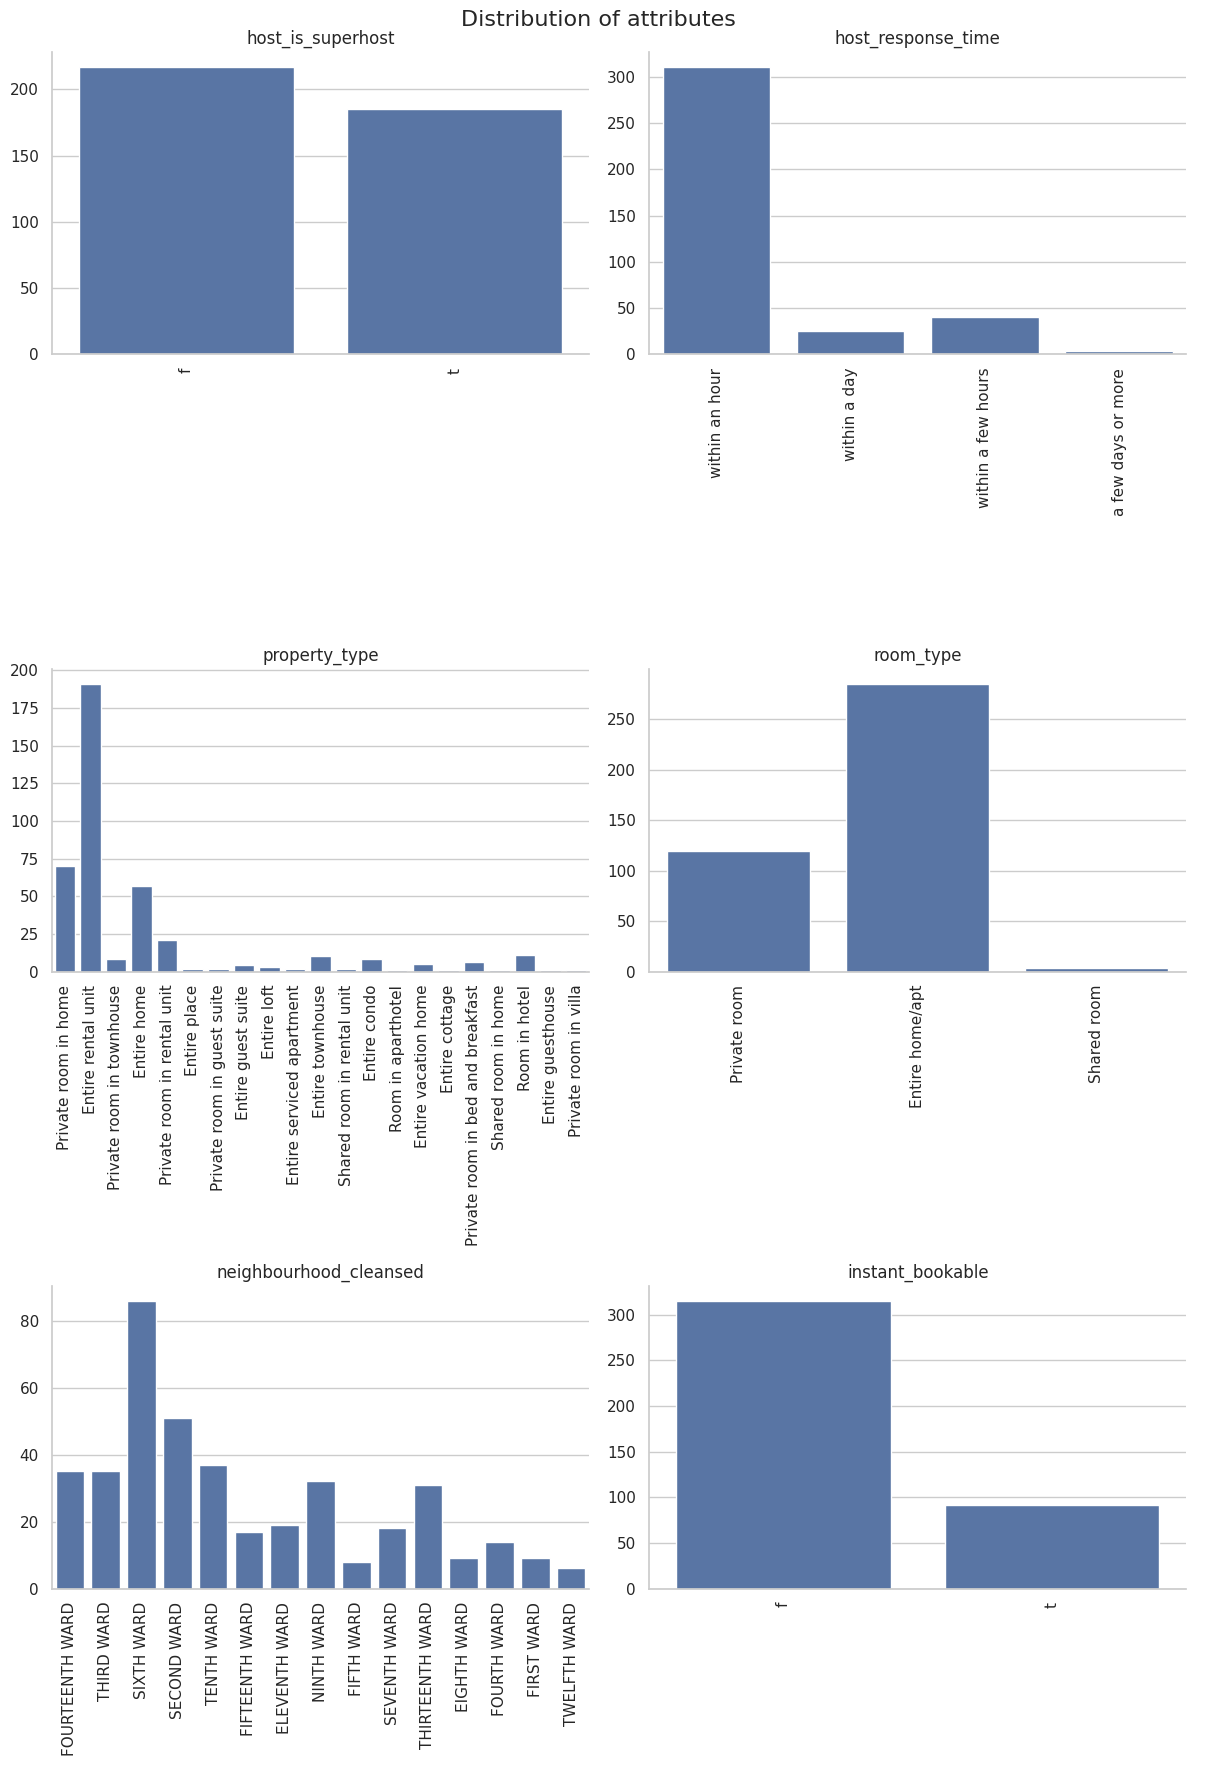

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 15))
g=sns.FacetGrid(data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price',
                     'number_of_reviews','host_listings_count','availability_90',
                     'minimum_nights','maximum_nights']].melt(),
              col="variable", height=3.5, aspect=1,col_wrap=4,sharex=False, sharey=False)
g.map(sns.boxplot,"value")
g.set_titles(col_template="{col_name}")
g.set_axis_labels('','')
g.add_legend()
g.fig.suptitle("Distribution of attributes", fontsize=16)
plt.tight_layout()
plt.show()

sns.set(style='whitegrid')
plt.figure(figsize=(10, 15))
g=sns.FacetGrid(data[['host_is_superhost','host_response_time',
                      'property_type','room_type','neighbourhood_cleansed',
                     'instant_bookable']].melt(),
              col="variable", height=6, aspect=1,col_wrap=2,sharex=False, sharey=False)
g.map(sns.countplot, "value")
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
g.set_axis_labels('','')
g.add_legend()
g.fig.suptitle("Distribution of attributes", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# imputation of missing cases with median

data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price','bathrooms','beds','host_acceptance_rate','host_response_rate',
     'bedrooms']] = data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price','bathrooms','beds','host_acceptance_rate','host_response_rate',
     'bedrooms']].fillna(data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price','bathrooms','beds','host_acceptance_rate','host_response_rate',
     'bedrooms']].median())


modes = data[['host_is_superhost', 'host_response_time']].mode().iloc[0]
data[['host_is_superhost', 'host_response_time']] = data[['host_is_superhost', 'host_response_time']].fillna(modes)


## 3) Removal of outliers

For outliers which are much visible on the boxplots above, all the values above 1.5 times the interquartile range were excluded from analysis for each variable.


In [ ]:
def remove_outliers_iqr(column):
    quartile1, quartile3 = np.percentile(column, [25, 75])
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - (iqr * 1.5)
    upper_bound = quartile3 + (iqr * 1.5)
    return column[(column < lower_bound) | (column > upper_bound)].index

# Remove outliers from each column

indices=[]
for col in data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price',
                     'number_of_reviews','host_listings_count','availability_90',
                     'minimum_nights','maximum_nights']].columns:
    indices.append(remove_outliers_iqr(data[col]))
datat=data.copy()
data=data.drop(np.unique(np.concatenate(indices)))


# Descriptive statistics

Descriptive statistics were used in this study to establish the typical values for each column. The properties included in this study had bedrooms ranging from 0 to 7, with typical properties having 1 bathroom. Similarly, the number of bedrooms ranged between 0 and 7, with typical properties having one bedroom. Airbnb properties in this sample had prices ranging between $33 and $1750, with the average property cost being USD 132.57 and the median price being USD 100.50. The most demanded property in this sample had 0 availability instances in every 90 days, while the least demanded was available for all 90 days. On average, properties in this sample were available for 54.10 days out of every 90 days, with a median availability of 72 days.

The covered hosts had an average of approximately 4.94 listings, with a minimum of 1 listing and a maximum of 16 listings. Properties had an average maximum stay limit of about 508 nights, with a standard deviation of 433.11 nights. The average minimum stay required by hosts was approximately 1.84 nights, with a standard deviation of 1.07 nights. Properties received an average of around 29.84 reviews, with scores ranging from 0 to 142. Review Scores (Accuracy, Check-in, Cleanliness, Communication, Location, Rating, Value): Across various aspects, properties consistently received high average scores ranging from 4.70 to 4.87, indicating overall positive guest experiences and satisfaction.

In [ ]:
datac=data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price',
                     'number_of_reviews','host_listings_count','availability_90',
                     'minimum_nights','maximum_nights']].melt()
datac.pivot_table(index='variable',
                        values='value',
                        aggfunc=['count','mean', 'median', 'std', 'min', 'max'])

,count,mean,median,std,min,max
,value,value,value,value,value,value
variable,,,,,,
availability_90,212,53.622642,71.000,35.185885,0.00,90.0
host_listings_count,212,4.929245,3.000,4.239254,1.00,16.0
maximum_nights,212,517.570755,365.000,443.771599,1.00,1125.0
minimum_nights,212,1.863208,2.000,1.095084,1.00,6.0
number_of_reviews,212,33.825472,17.500,38.210352,0.00,142.0
price,212,96.561321,99.000,34.393472,33.00,191.0
review_scores_accuracy,212,4.907877,4.920,0.095767,4.56,5.0
review_scores_checkin,212,4.929717,4.950,0.079459,4.67,5.0


## Correlation
A look into the correlation between Demand (availability) and the other variables shows a weak negative correlation, indicating that room availability decreases as those variables increase, or rather, demand increases with the variables.

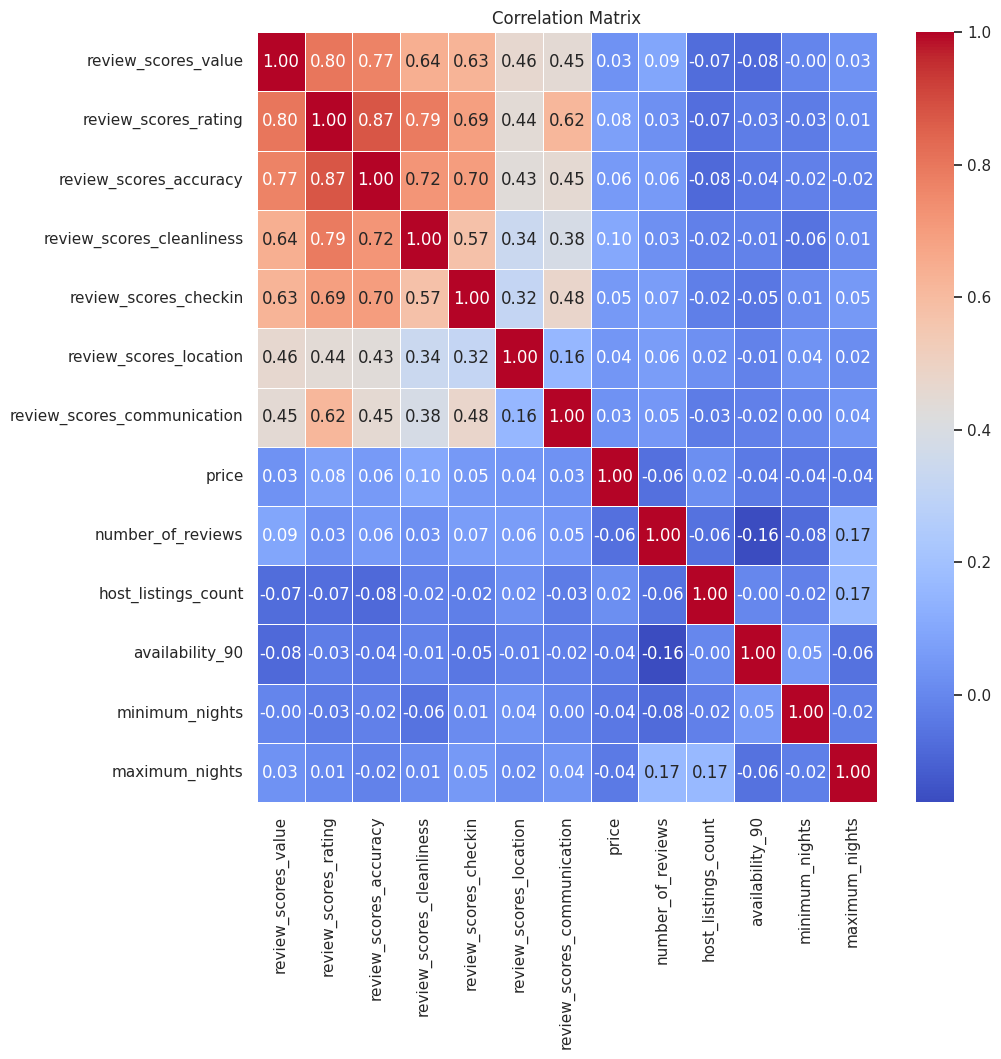

In [ ]:
from scipy.stats import spearmanr
correlation_matrix = datat[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price','number_of_reviews','host_listings_count','availability_90',
                     'minimum_nights','maximum_nights']].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
datac=data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price','bathrooms','beds','host_acceptance_rate','host_response_rate',
     'bedrooms']].melt()
datac.pivot_table(index='variable',
                        values='value',
                        aggfunc=['count','mean', 'median', 'std', 'min', 'max'])

,count,mean,median,std,min,max
,value,value,value,value,value,value
variable,,,,,,
bathrooms,212,1.158019,1.000,0.412807,0.00,3.0
bedrooms,212,1.443396,1.000,0.791904,0.00,5.0
beds,212,1.476415,1.000,0.840001,0.00,6.0
host_acceptance_rate,212,91.995283,97.500,16.423454,0.00,100.0
host_response_rate,212,96.707547,100.000,10.302042,20.00,100.0
price,212,96.561321,99.000,34.393472,33.00,191.0
review_scores_accuracy,212,4.907877,4.920,0.095767,4.56,5.0
review_scores_checkin,212,4.929717,4.950,0.079459,4.67,5.0


An analysis of variance was used to compare average room availability across neighborhoods. It shows no significant difference between the mean availability across neighborhoods (F = 0.992364, p = 0.460175).

In [ ]:
from statsmodels.formula.api import ols
model = ols('availability_90~ neighbourhood_cleansed', data=datat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                               sum_sq     df         F    PR(>F)
neighbourhood_cleansed   17419.739460   14.0  0.992364  0.460175
Residual                491505.739656  392.0       NaN       NaN


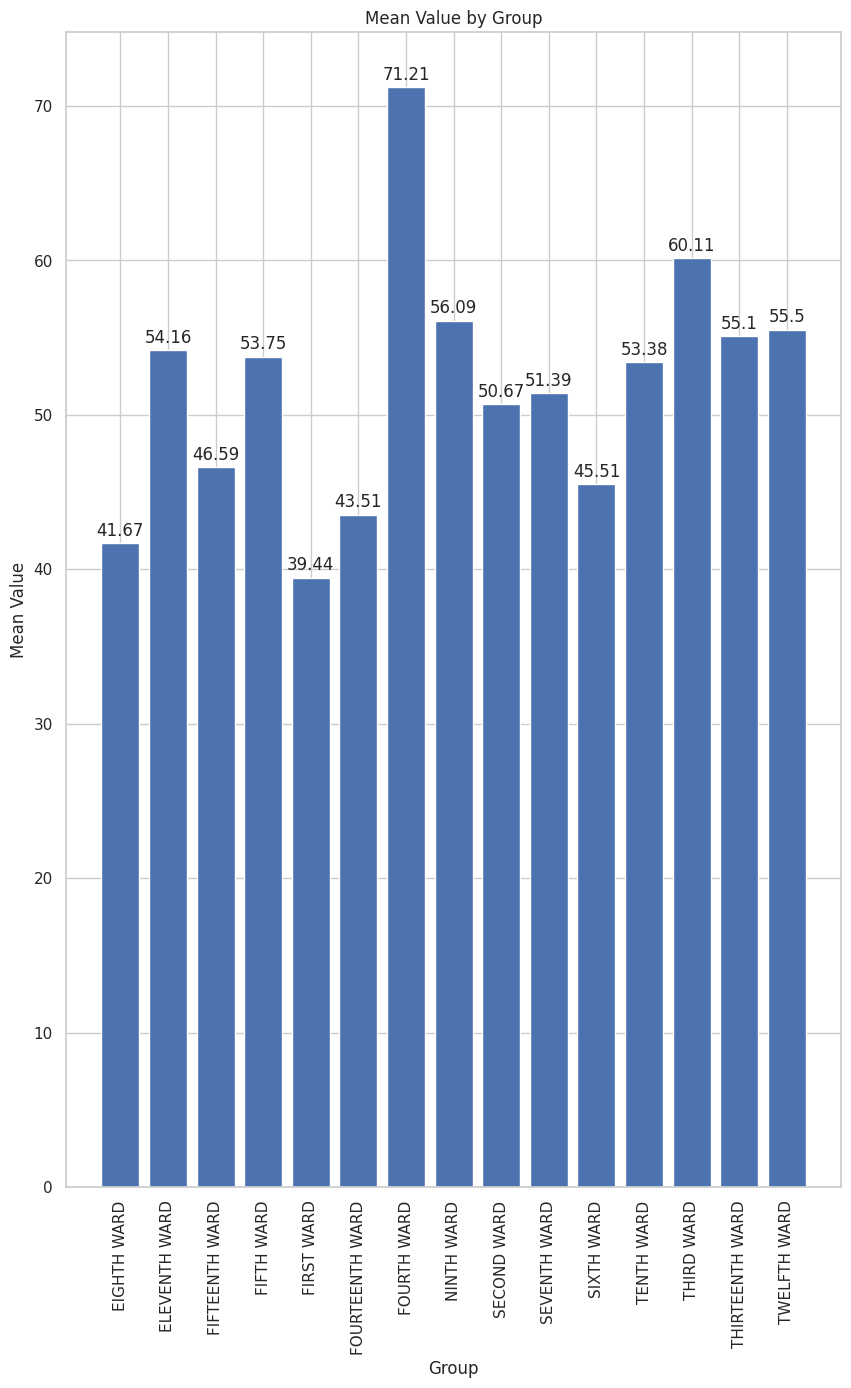

In [ ]:
plt.figure(figsize=(10, 15))
group_means = datat.groupby('neighbourhood_cleansed')['availability_90'].mean()
plt.bar(group_means.index, group_means.values)
for i, v in enumerate(group_means.values):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center')
plt.xticks(rotation=90)
plt.xlabel('Group')
plt.ylabel('Mean Value')
plt.title('Mean Value by Group')
plt.show()

On the other hand, the test shows a significant difference in availability(F=5.329303,p=0.005194) across room type, the bar graph below illustrates that shared properties were most available(less demaded) with average availability(87.67). Entire home(47.87) was the most with average availabilty(47.87).

In [ ]:
model = ols('availability_90 ~ room_type', data=datat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                  sum_sq     df         F    PR(>F)
room_type   13081.691588    2.0  5.329303  0.005194
Residual   495843.787528  404.0       NaN       NaN


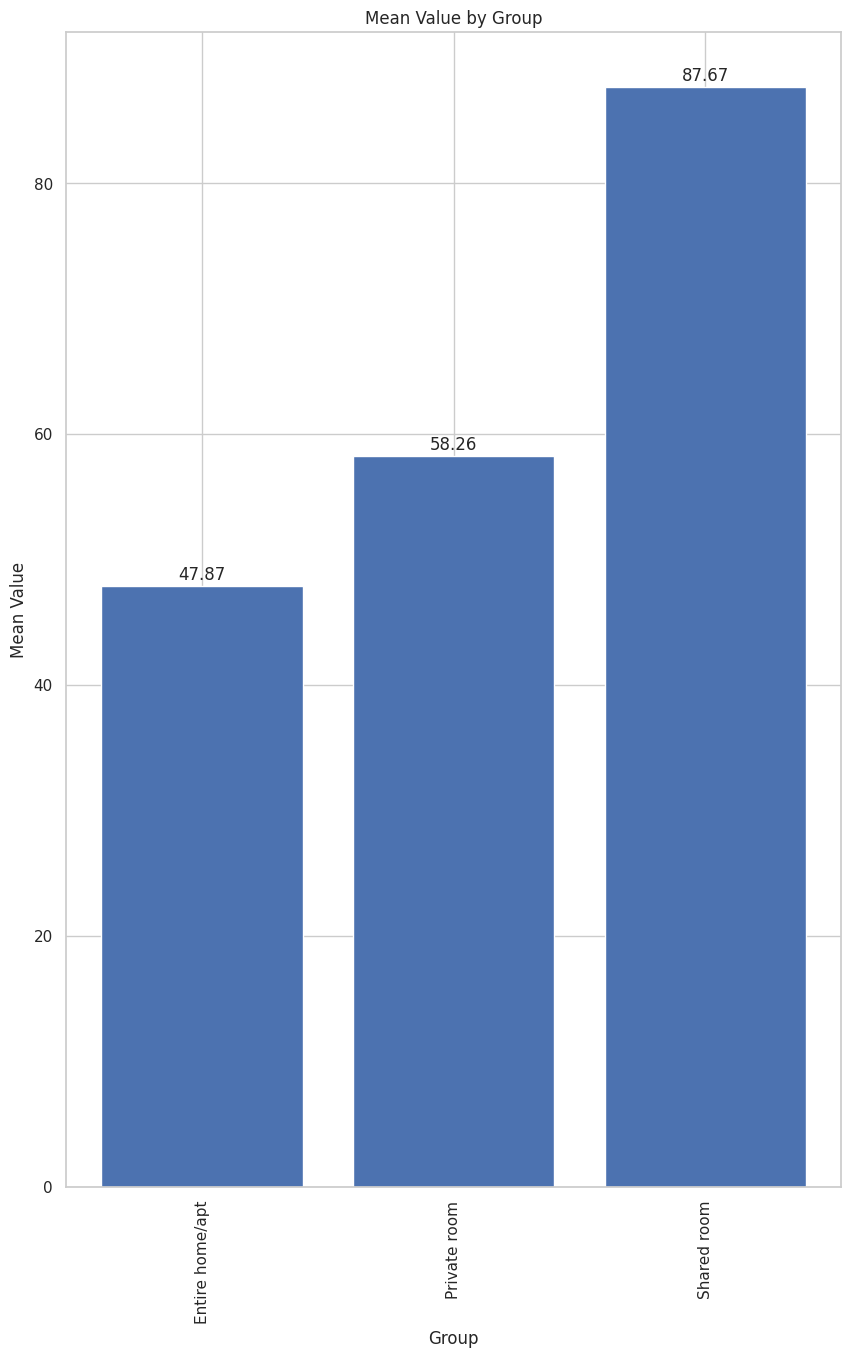

In [ ]:
plt.figure(figsize=(10, 15))
group_means = datat.groupby('room_type')['availability_90'].mean()
plt.bar(group_means.index, group_means.values)
for i, v in enumerate(group_means.values):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center')
plt.xticks(rotation=90)
plt.xlabel('Group')
plt.ylabel('Mean Value')
plt.title('Mean Value by Group')
plt.show()

Listing by super hosts posts significantly low availability(F=6.363001, p=0.012035) compared to  listings by other hosts, indicating high demands for listings from superhosts


In [ ]:
model = ols('availability_90 ~ host_is_superhost', data=datat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                          sum_sq     df         F    PR(>F)
host_is_superhost    7872.106143    1.0  6.363001  0.012035
Residual           501053.372973  405.0       NaN       NaN


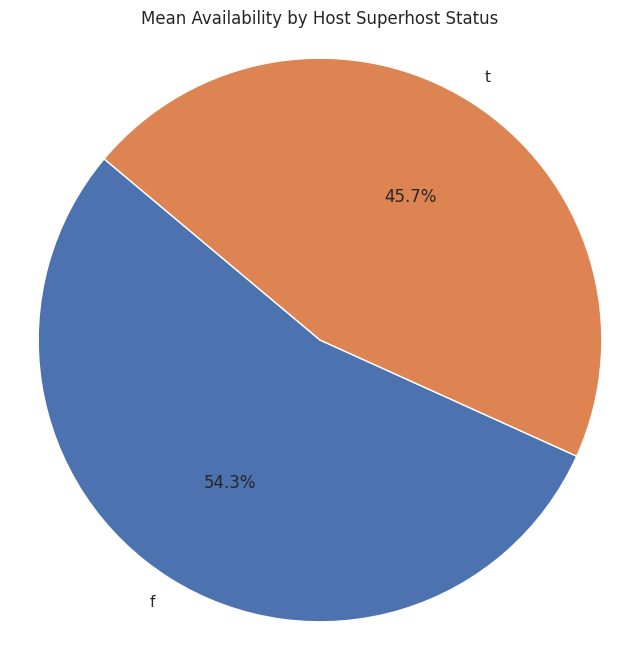

In [ ]:
group_means = datat.groupby('host_is_superhost')['availability_90'].mean()
plt.figure(figsize=(8, 8))
plt.pie(group_means.values, labels=group_means.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean Availability by Host Superhost Status')
plt.axis('equal')

plt.show()

host response time showed no significant impact on property demand(F= 0.751754,p=0.521825).same for instant bookings

In [ ]:
model = ols('availability_90 ~ host_response_time', data=datat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                           sum_sq     df         F    PR(>F)
host_response_time    2832.189203    3.0  0.751754  0.521825
Residual            506093.289912  403.0       NaN       NaN


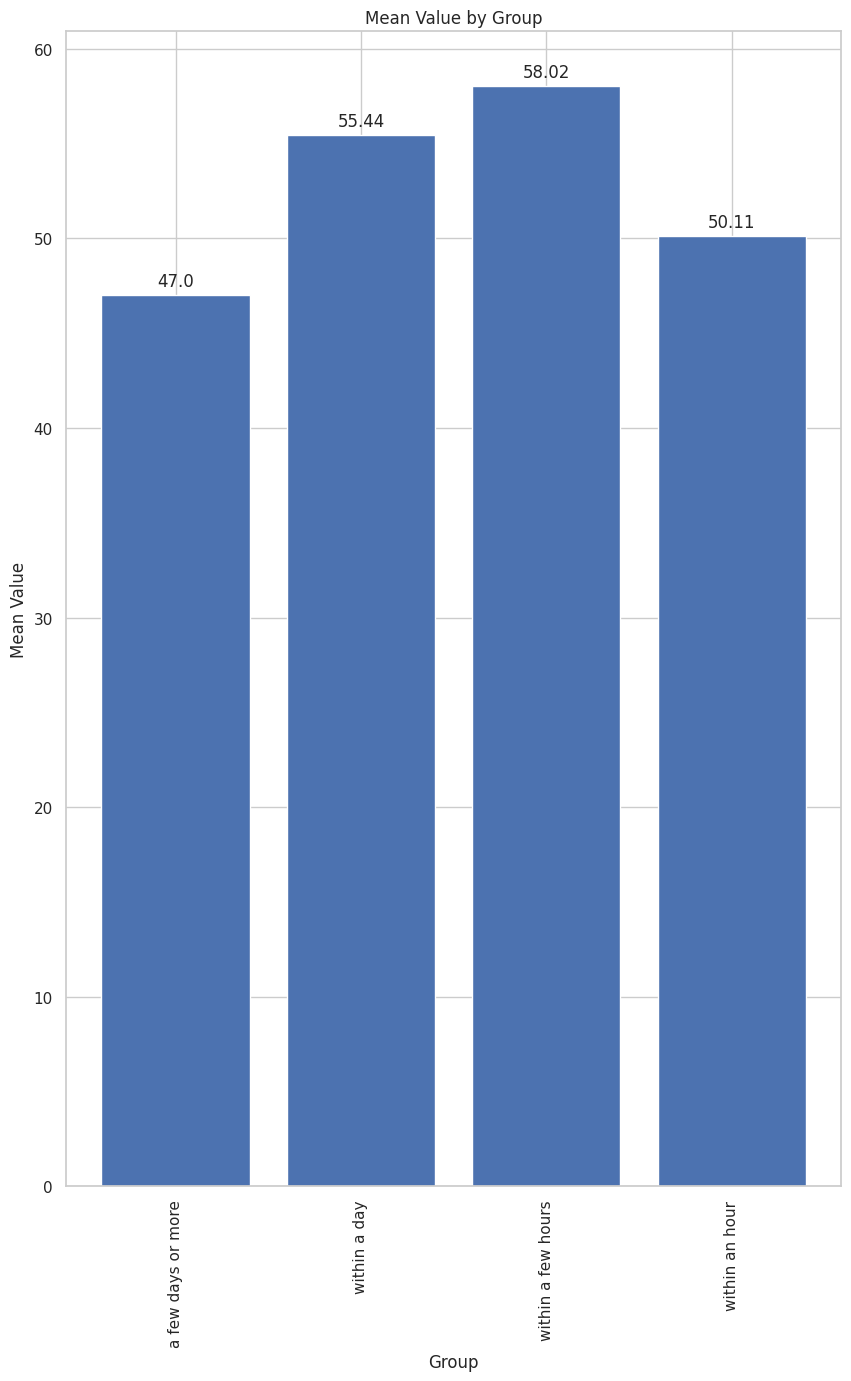

In [ ]:
plt.figure(figsize=(10, 15))
group_means = datat.groupby('host_response_time')['availability_90'].mean()
plt.bar(group_means.index, group_means.values)
for i, v in enumerate(group_means.values):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center')
plt.xticks(rotation=90)
plt.xlabel('Group')
plt.ylabel('Mean Value')
plt.title('Mean Value by Group')
plt.show()

In [ ]:
model = ols('availability_90 ~ instant_bookable', data=datat).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA results:")
print(anova_table)

ANOVA results:
                         sum_sq     df         F    PR(>F)
instant_bookable    1336.306410    1.0  1.066225  0.302416
Residual          507589.172705  405.0       NaN       NaN


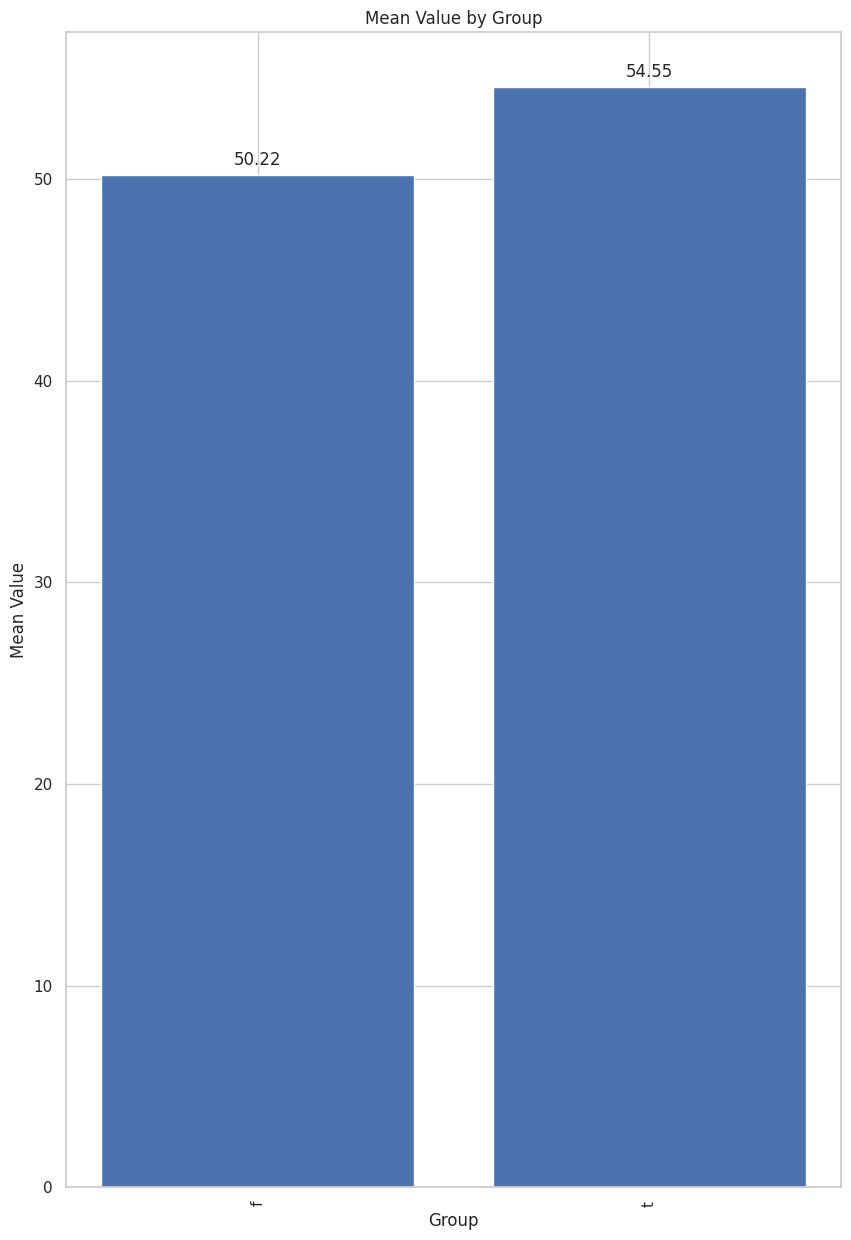

In [ ]:
plt.figure(figsize=(10, 15))
group_means = datat.groupby('instant_bookable')['availability_90'].mean()
plt.bar(group_means.index, group_means.values)
for i, v in enumerate(group_means.values):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center')
plt.xticks(rotation=90)
plt.xlabel('Group')
plt.ylabel('Mean Value')
plt.title('Mean Value by Group')
plt.show()

In [ ]:
mapping = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}

# Recode the values to numeric
data['host_response_time'] = data['host_response_time'].replace(mapping)

mapping = {
    'f': 0,
    't': 1
}
data['host_is_superhost'] = data['host_is_superhost'].replace(mapping)
data['instant_bookable'] = data['instant_bookable'].replace(mapping)

mapping = {
    'FIRST WARD': 1,
    'SECOND WARD': 2,
    'THIRD WARD': 3,
    'FOURTH WARD': 4,
    'FIFTH WARD': 5,
    'SIXTH WARD': 6,
    'SEVENTH WARD': 7,
    'EIGHTH WARD': 8,
    'NINTH WARD': 9,
    'TENTH WARD': 10,
    'ELEVENTH WARD': 11,
    'TWELFTH WARD': 12,
    'THIRTEENTH WARD': 13,
    'FOURTEENTH WARD': 14,
    'FIFTEENTH WARD': 15
}
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].replace(mapping)

mapping = {
    'Entire rental unit': 1,
    'Private room in home': 2,
    'Entire home': 3,
    'Private room in rental unit': 4,
    'Room in hotel': 5,
    'Entire townhouse': 6,
    'Entire condo': 7,
    'Private room in townhouse': 8,
    'Private room in bed and breakfast': 9,
    'Entire vacation home': 10,
    'Entire guest suite': 11,
    'Entire loft': 12,
    'Private room in guest suite': 13,
    'Entire serviced apartment': 14,
    'Entire place': 15,
    'Shared room in rental unit': 16,
    'Room in aparthotel': 17,
    'Entire cottage': 18,
    'Shared room in home': 19,
    'Entire guesthouse': 20,
    'Private room in villa': 21
}
data['property_type'] = data['property_type'].replace(mapping)

mapping = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3
}
data['room_type'] = data['room_type'].replace(mapping)

/tmp/ipykernel_18/2165936919.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['host_response_time'] = data['host_response_time'].replace(mapping)
/tmp/ipykernel_18/2165936919.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['host_is_superhost'] = data['host_is_superhost'].replace(mapping)
/tmp/ipykernel_18/2165936919.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in

A linear regression model was fit to uncover the relationship between the factors and availability. review_scores_value was found to significantly impact availability at 5% level(B=-59.8852,p=0.038) which means a unit increase on the average review score leads to 58.1013 decrease on availability90. this is interpreted to mean that demand increases with review score. Price on the other hand has a significant impact on availability(B=-0.2441,p=0.000), same as number_of_reviews(B=-0.2147,p=0.003)

In [ ]:
X = sm.add_constant(data[['review_scores_value','review_scores_rating','review_scores_accuracy',
     'review_scores_cleanliness','review_scores_checkin','review_scores_location',
     'review_scores_communication','price','number_of_reviews','host_listings_count',
                     'minimum_nights','maximum_nights','bathrooms','bedrooms','beds']])
model = sm.OLS(data['availability_90'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        availability_90   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     3.005
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           0.000234
Time:                        19:13:37   Log-Likelihood:                -1033.2
No. Observations:                 212   AIC:                             2098.
Df Residuals:                     196   BIC:                             2152.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         253.0330    214.162      1.182      0.239    -169.325     675.391
review_scores_value           -59.8852     27.857     -2.150      0.033    -114.823      -4.947
review_scores_rating            5.6258     43.387      0.130      0.897     -79.939      91.190
review_scores_accuracy         75.3025     43.705      1.723      0.086     -10.891     161.496
review_scores_cleanliness     -47.5105     25.620     -1.854      0.065     -98.036       3.015
review_scores_checkin          58.7788     38.301      1.535      0.126     -16.757     134.315
review_scores_location        -19.5238     14.209     -1.374      0.171     -47.545       8.498
review_scores_communication   -51.0339     52.050     -0.980      0.328    -153.684      51.617
price                          -0.1432      0.087     -1.646      0.101      -0.315       0.028
number_of_reviews              -0.2291      0.068     -3.376      0.001      -0.363      -0.095
host_listings_count             0.5031      0.603      0.835      0.405      -0.685       1.691
minimum_nights                 -0.0400      2.226     -0.018      0.986      -4.430       4.350
maximum_nights                 -0.0035      0.006     -0.615      0.539      -0.015       0.008
bathrooms                       9.5181      5.834      1.631      0.104      -1.988      21.024
bedrooms                       -2.0843      4.266     -0.489      0.626     -10.498       6.330
beds                           -4.1343      4.027     -1.027      0.306     -12.076       3.807
==============================================================================
Omnibus:                       29.895   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.636
Skew:                          -0.560   Prob(JB):                     0.000148
Kurtosis:                       2.139   Cond. No.                     6.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion

The study has established that price, number of reviews,review_scores_value, room type and  whether host is a super host are the significant factors influencing demand.

The study has effectively identified several significant factors influencing demand within the Airbnb market in Albany, New York. Primarily, the analysis reveals that price, number of reviews, review_scores_value, room type, and whether the host is a superhost play crucial roles in determining demand.

Price: The analysis demonstrates that pricing significantly impacts demand for Airbnb listings. Properties with lower prices tend to experience higher demand, reflecting the sensitivity of consumers to pricing decisions.

Number of Reviews: The number of reviews received by a property emerges as another influential factor affecting demand. Listings with a higher number of reviews may signal greater popularity and credibility, thus attracting more bookings.

Review Scores Value: Guest perceptions of value, as reflected in review scores, also play a pivotal role in influencing demand. Properties with higher review_scores_value ratings are likely to attract more guests, indicating the importance of offering a satisfying and worthwhile experience to guests.

Room Type: The type of room offered by the listing is another determinant of demand. Different types of accommodations (e.g., entire homes, private rooms, shared rooms) appeal to different segments of travelers, with preferences driven by factors such as privacy, space, and budget.

Superhost Status: The analysis underscores the significance of a host's superhost status in influencing demand. Superhosts, who have demonstrated exceptional hospitality and received positive feedback from guests, are likely to enjoy higher demand for their listings due to the trust and confidence instilled in potential guests.

In conclusion, understanding and effectively managing these factors are essential for stakeholders in the Airbnb market in Albany to optimize their listings, attract more guests, and ultimately enhance their competitiveness and profitability. By leveraging insights from this study, stakeholders can tailor their strategies regarding pricing, guest satisfaction, property management, and marketing efforts to meet the evolving demands of the market effectively.